### Task 1 - Exploratory Data Analysis (EDA)

In [ ]:
#setup
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# load data
path = "/content/drive/MyDrive/Projects/Cognizant/sample_sales_data.csv"
df = pd.read_csv(path)
df.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


**Columns Description:**

*   transaction_id = unique ID that is assigned to each transaction
*   timestamp = date & time at which the transaction was made
*   product_id = an ID that is assigned to the product that was sold. Each product has a unique ID
*   category = category that the product is contained within
*   customer_type = type of customer that made the transaction
*   unit_price = the price that 1 unit of this item sells for
*   quantity = the number of units sold for this product within this transaction
*   total = the total amount payable by the customer
*   payment_type = the payment method used by the customer

In [ ]:
# eliminate the column
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [ ]:
# sample size and data types
print(df.shape)
print(df.dtypes)

(7829, 9)
transaction_id     object
timestamp          object
product_id         object
category           object
customer_type      object
unit_price        float64
quantity            int64
total             float64
payment_type       object
dtype: object


The data sample size is around 8000 rows with 9 columns representing sales transactions and is a mix of different data types - int, object and float.

In [ ]:
# check for missing/ null values
missing_values = df.isnull().sum()
missing_values

transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

The dataset sample has no missing values. Hence, we can proceed with further analyzing the data using descriptive statistics variables.

In [ ]:
# Descriptive Statistics - Numerical Columns
stats_summary = df.describe()
stats_summary

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


The descriptive function gives the summary output for numerical variables in the dataframe. While the minimum and maximum quantity of an item sold are 1 and 4 respectively, the average sales total is 19.7

For the categorical columns, we summarize individual columns for understanding the data in those columns.

In [ ]:
# Descriptive Statistics - Categorical Columns
# column - category
stats_category = df['category'].describe()
stats_category

count      7829
unique       22
top       fruit
freq        998
Name: category, dtype: object

There are 22 different caegories of groceries that customers purchased from the data. Among 22 of them, Fruits seems to be the most common category customers purchased. However, we might need more data to understand if there are other categories.

In [ ]:
# column - customer type
stats_customer = df['customer_type'].describe()
stats_customer

count           7829
unique             5
top       non-member
freq            1601
Name: customer_type, dtype: object

Among 5 types of Gala's customers, most customers belonged to non-member category.

In [ ]:
# column - payment type
stats_payment = df['payment_type'].describe()
stats_payment

count     7829
unique       4
top       cash
freq      2027
Name: payment_type, dtype: object

**Visualization**

While there are online and card options available, the results shows that atleast 25% customers preferred to pay by cash.

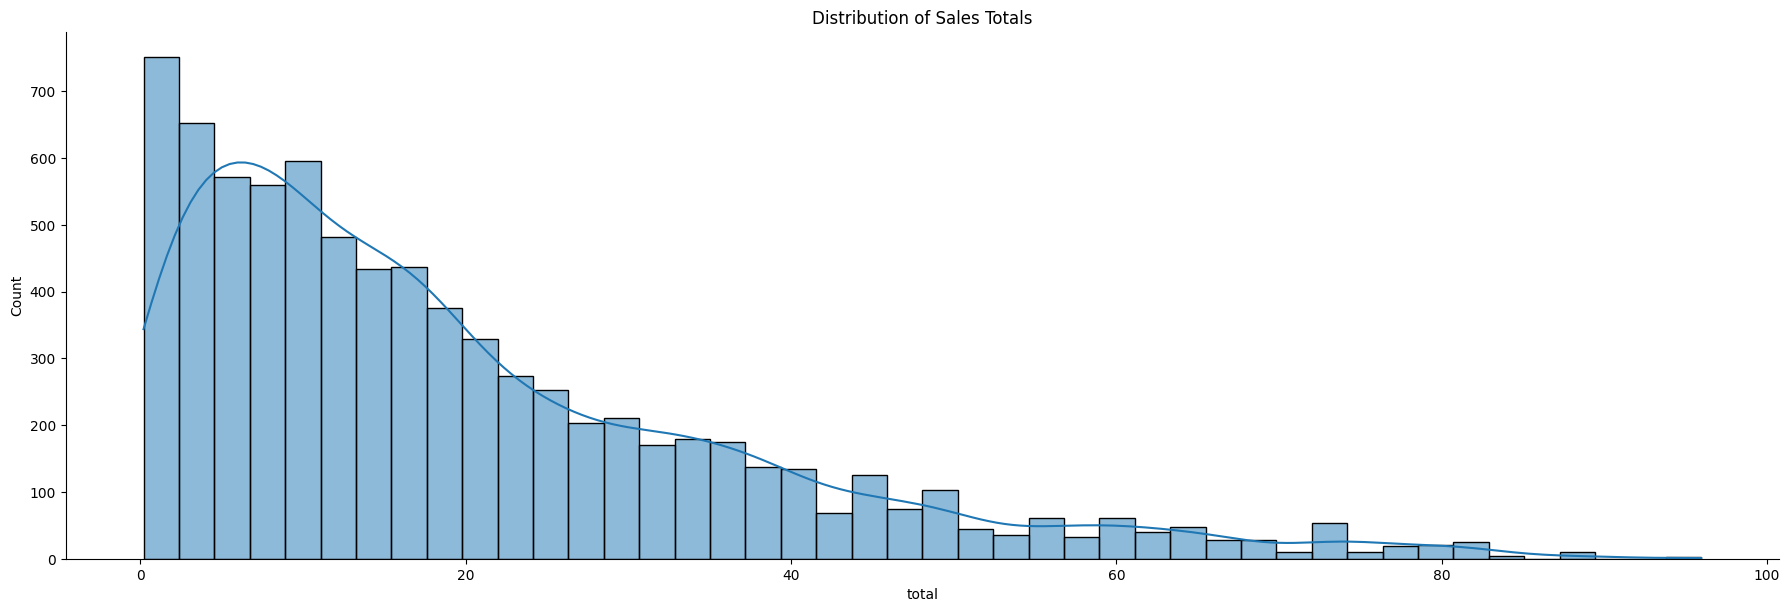

In [ ]:
def plot_totals(data: pd.DataFrame = None, column: str = None, height: int = 6):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/2).set(title=f'Distribution of Sales Totals')

plot_totals(data=df, column=df['total'],height=6)

The distribution plot for total sales clearly indicates that most of the purchase totals range between 0 and 20 dollars.

cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: payment_type, dtype: int64


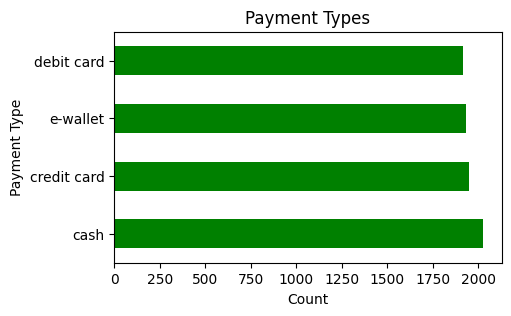

In [ ]:
def get_unique_values(data, column):
  num_unique_values = len(data['payment_type'].unique())
  value_counts = data['payment_type'].value_counts()
  print(value_counts)

  # plot
  plt.figure(figsize=(5, 3))
  value_counts.plot(kind='barh', color='green')
  plt.xlabel('Count')
  plt.ylabel('Payment Type')
  plt.title(f'Payment Types')
  plt.show()

get_unique_values(df, df['payment_type'])

Customers choosing different payment methods is almost equal with cash payment surpassing others in the given data sample.

non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: customer_type, dtype: int64


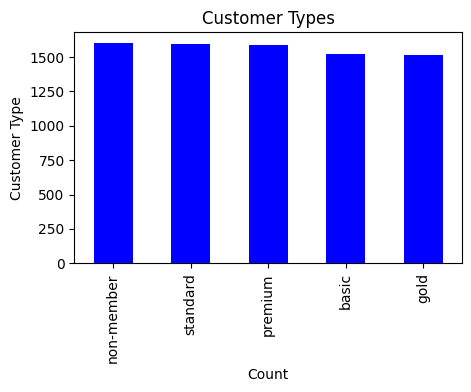

In [ ]:
def get_unique_values(data, column):
  num_unique_values = len(data['customer_type'].unique())
  value_counts = data['customer_type'].value_counts()
  print(value_counts)

  # plot
  plt.figure(figsize=(5, 3))
  value_counts.plot(kind='bar', color='blue')
  plt.xlabel('Count')
  plt.ylabel('Customer Type')
  plt.title(f'Customer Types')
  plt.show()

get_unique_values(df, df['customer_type'])

The number of different types of customers visiting the store is almost equal across all categories.

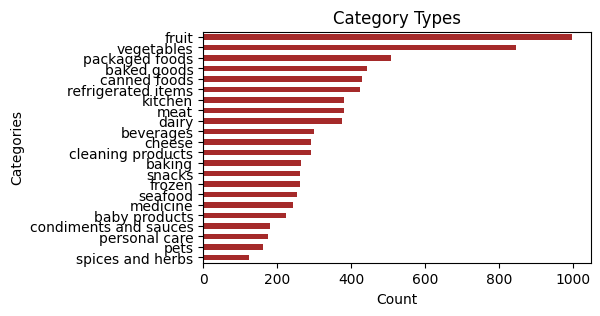

In [ ]:
def get_unique_values(data, column):
  num_unique_values = len(data['category'].unique())
  value_counts = data['category'].value_counts()
  # sort descending
  value_counts = value_counts.sort_values(ascending=True)

  # plot
  plt.figure(figsize=(5, 3))
  value_counts.plot(kind='barh', color='brown')
  plt.xlabel('Count')
  plt.ylabel('Categories')
  plt.title(f'Category Types')
  plt.show()

get_unique_values(df, df['category'])

The bar chart clearly shows that fruits followed by vegetables (fresh produce) are the most popular purchases from the store.

In [ ]:
def correlation_plot(data: pd.DataFrame = None):
    corr = data.corr()
    display(corr.style.background_gradient(cmap='coolwarm'))

correlation_plot(data=df)

<ipython-input-17-c116f336a07a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


,unit_price,quantity,total
unit_price,1.000000,0.024588,0.792018
quantity,0.024588,1.000000,0.521926
total,0.792018,0.521926,1.000000


The unit-price and totals have positive correlation - indicating the unit price factor has effect on sales.

**EDA Sumamry:**
*   A basic understanding of the data has been done through Exploratory Data Analysis.
*   However, for the given problem statement, the data sample is not sufficient to perform further analysis.
    1. We need additional features to dive deep into the data
    2. A larger sample size will be helpful in providing solid recommendations without skewing the results.
*   The given problem statemnt is broad and to simplify this, we can formulate a few initial questions:
    1. Are there any seasonal trend patterns in the fresh produce sales?
    2. Is there a demand difference across multiple stores for the similar categories?
    3. Understand the demand for the categorical items - need more historical data for this.
    4. What is the change in sales and demand patterns in various seasons?
*   Questions for stakeholders to understand the problem:
    1. Are the suppliers reliable for on-time delivery and product quality?
    2. What are the problems or risks encountered during overstocking and stockouts?
    3. What are the currently implemented inventory management methods?







